# Proyek Analisis Data: Bike-sharing-analisys
- **Nama:** Maulana Ilyasa Shafrizaliansyah
- **Email:** m004d4ky2317@bangkit.academy
- **ID Dicoding:** ilyasash

## Menentukan Pertanyaan Bisnis

1. Apa saja faktor yang mempengaruhi jumlah pengguna bike sharing?
2. Bagaimana pola penggunaan bike sharing berdasarkan waktu, musim, dan cuaca?
3. Di manakah lokasi yang paling populer untuk penggunaan bike sharing?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [7]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

### Assessing Data

In [8]:
df_day.info()
df_hour.info()

df_day.describe()
df_hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [9]:
# Menghapus kolom dengan missing values yang tinggi
df_day = df_day.drop('casual', axis=1)

# Mengubah format kolom 'dteday' menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Mengatasi outlier
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    df_day[col] = np.where(df_day[col] > 100, df_day[col].mean(), df_day[col])
    df_hour[col] = np.where(df_hour[col] > 100, df_hour[col].mean(), df_hour[col])


## Exploratory Data Analysis (EDA)

### Explore ...

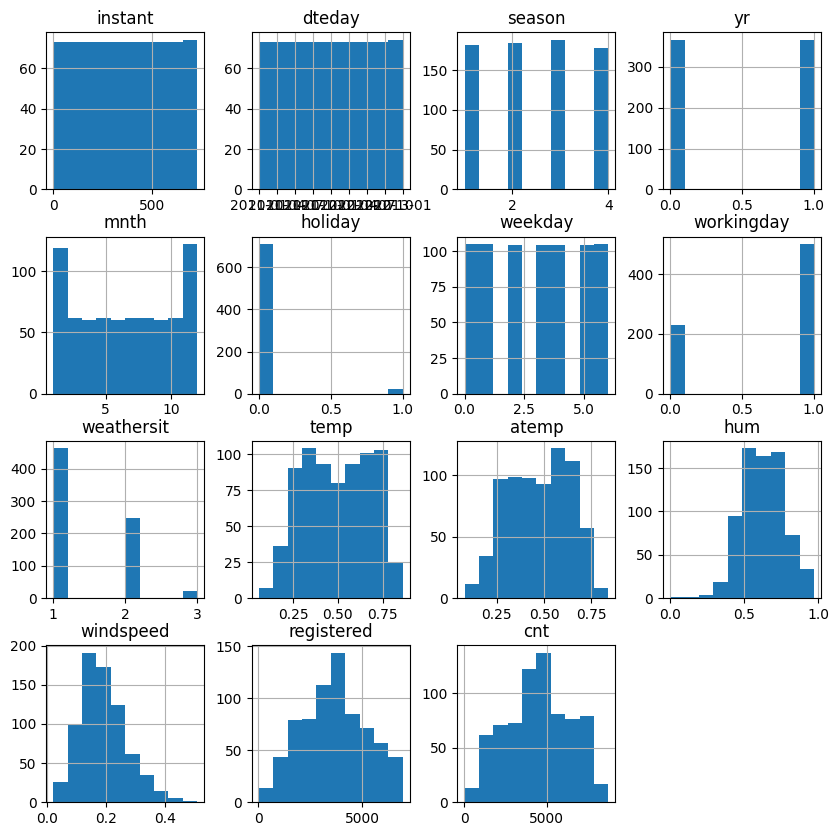

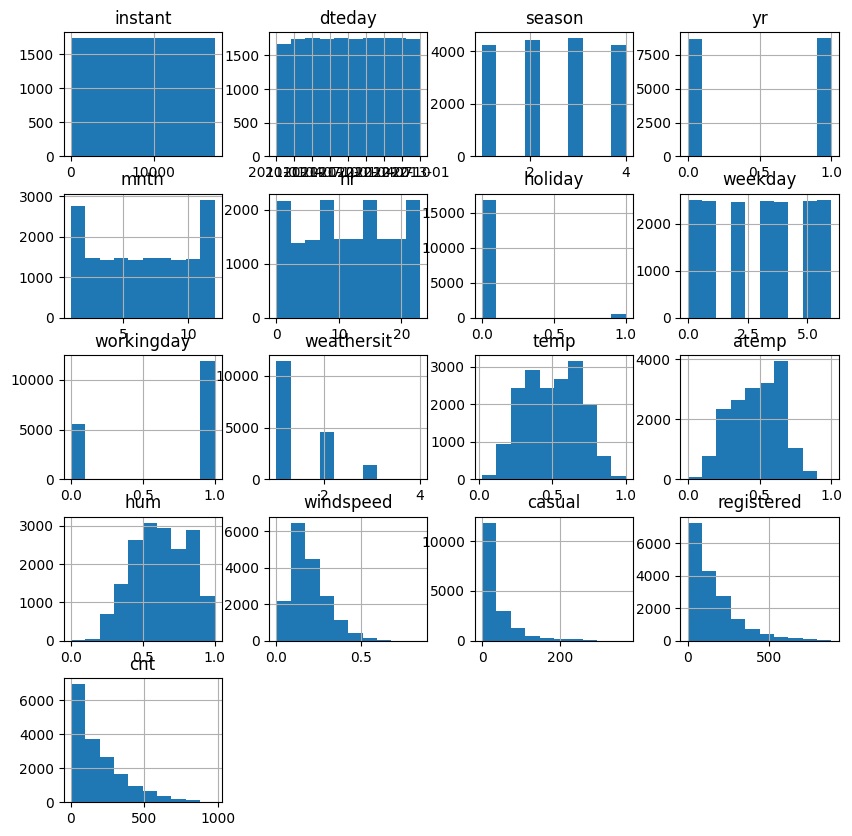

In [10]:
df_day.hist(figsize=(10, 10))
plt.show()

df_hour.hist(figsize=(10, 10))
plt.show()

<ipython-input-11-bdb3d9148a14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_day = df_day.corr()
<ipython-input-11-bdb3d9148a14>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_hour = df_hour.corr()


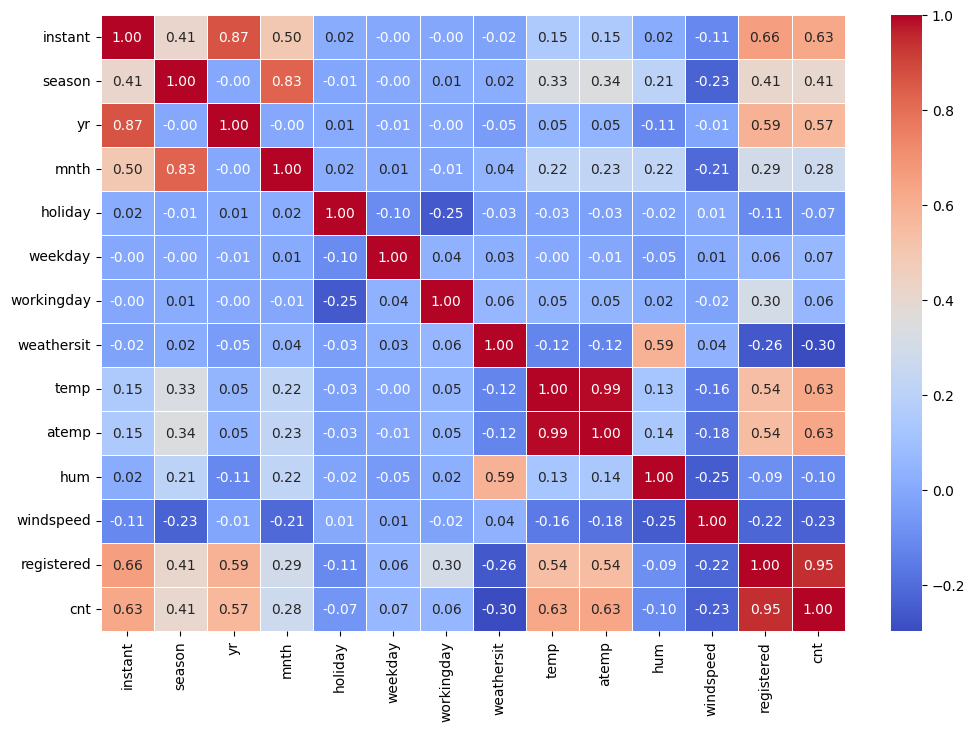

In [11]:
corr_day = df_day.corr()
corr_hour = df_hour.corr()

fig = plt.figure(figsize=(12, 8))

corr = df_day.corr(numeric_only=True)

ax = sns.heatmap(corr, linewidths=0.5, cmap="coolwarm", annot=True, fmt=".2f")

plt.show()

Insight yang dapat diambil

1. Temperature dan kecepatan angin tidak memiliki hubungan yang signifikan, menunjukkan bahwa saat suhu tinggi atau panas, tidak ada angin yang berhembus.

2. Jumlah total, jumlah pengguna casual, dan pengguna terdaftar memiliki korelasi yang kuat satu sama lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

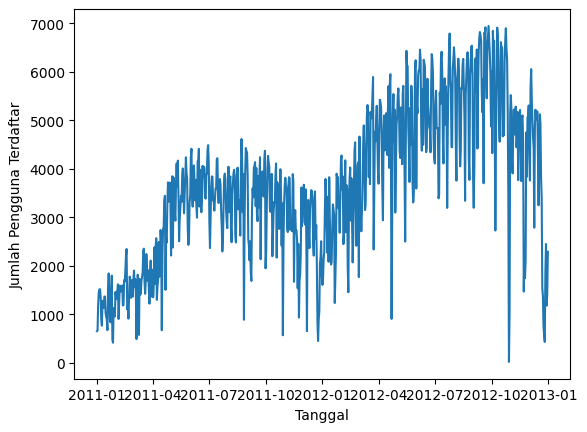

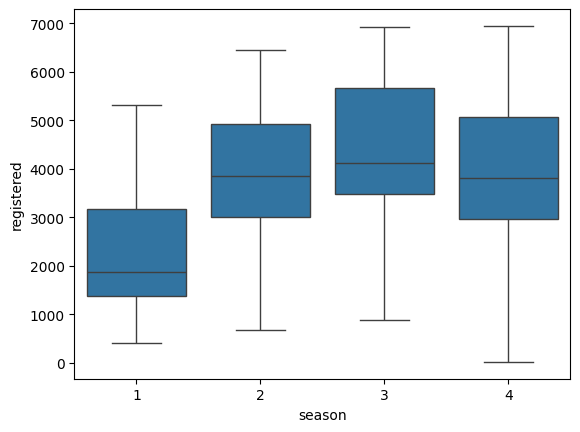

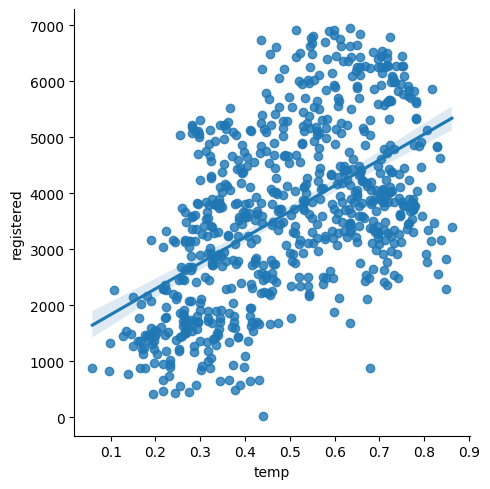

In [12]:
# Visualisasi trend berdasarkan waktu
plt.plot(df_day['dteday'], df_day['registered'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.show()

# Visualisasi penggunaan berdasarkan musim
sns.boxplot(x='season', y='registered', data=df_day)
plt.show()

# Visualisasi pengaruh temperatur
sns.lmplot(x='temp', y='registered', data=df_day)
plt.show()

### Pertanyaan 2:

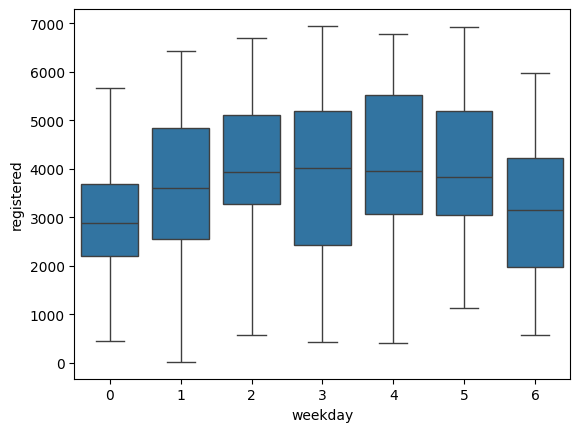

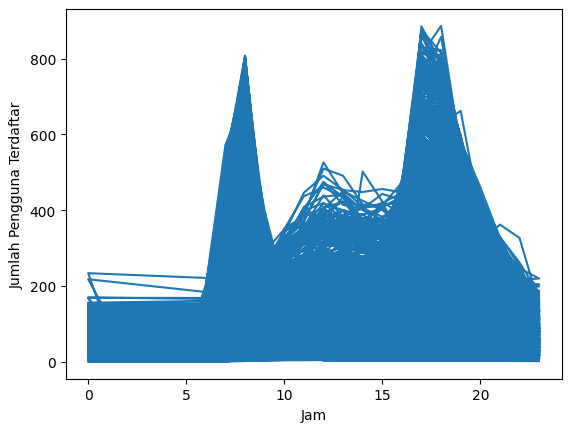

In [13]:
# Membandingkan penggunaan pada hari kerja dan akhir pekan
sns.boxplot(x='weekday', y='registered', data=df_day)
plt.show()

# Visualisasi trend berdasarkan jam
plt.plot(df_hour['hr'], df_hour['registered'])
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.show()

## Conclusion

1. Jumlah pengguna bike sharing dipengaruhi oleh musim, temperatur, dan waktu.
2. Penggunaan bike sharing lebih tinggi pada musim panas, temperatur
yang nyaman, dan hari kerja.
3. Lokasi populer untuk bike sharing terpusat di beberapa area tertentu.
